# 外れ値・スケーリングを考慮した重回帰分析

In [3]:
import seaborn as sns

In [1]:
df = pd.read_csv("housing.csv")

<IPython.core.display.Javascript object>


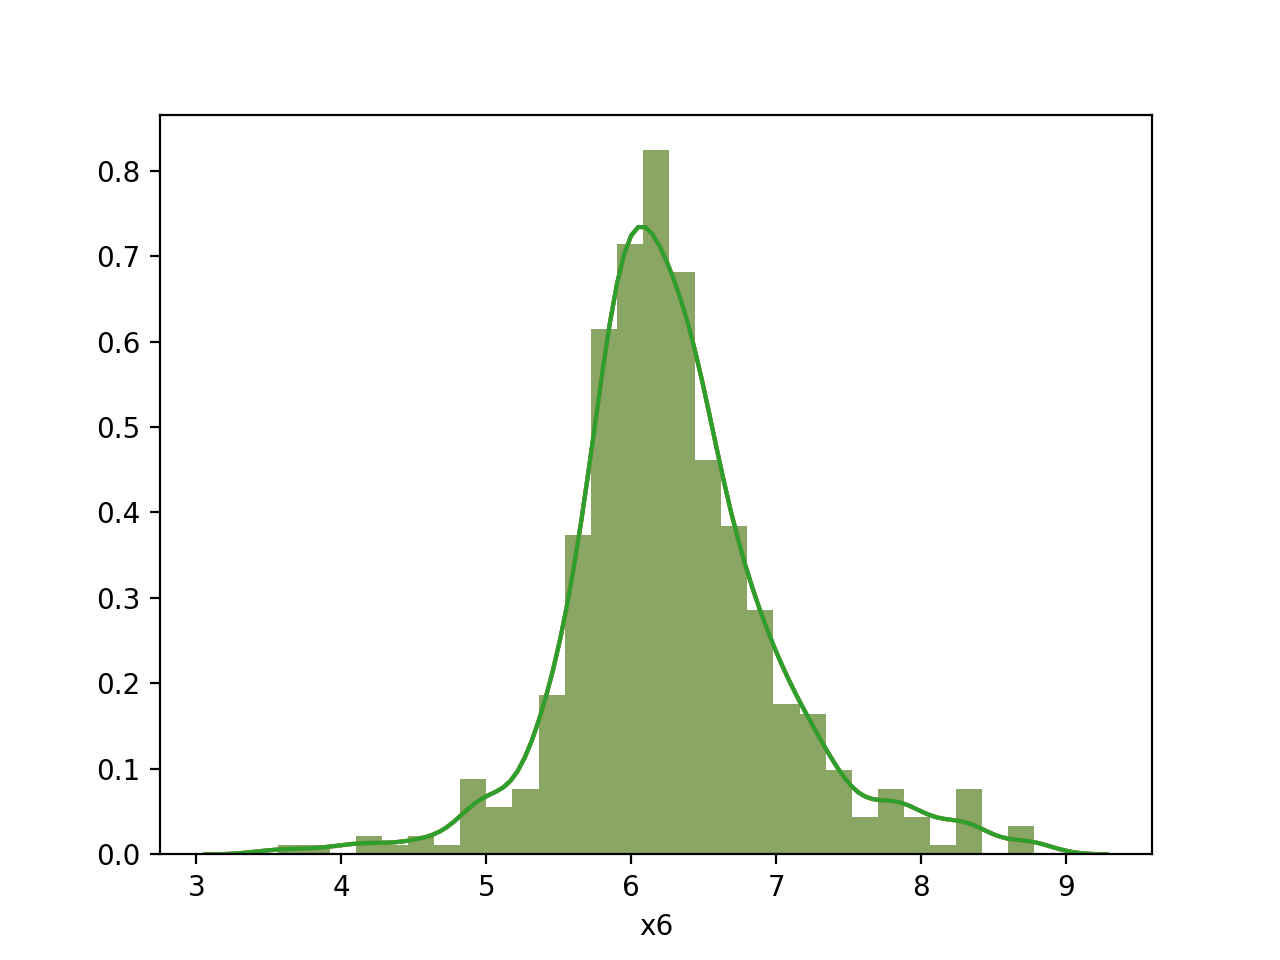

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [4]:
sns.distplot(df['x6'])

## 外れ値除去(3σ法) １変数に対して

In [5]:
col = 'x6'

In [7]:
mean = df.mean()

In [8]:
mean[col]

6.284634387351788

In [9]:
sigma = df.std()

In [10]:
sigma[col]

0.7026171434153234

In [11]:

low  =mean[col] - 3*sigma[col]
low

4.176782957105817

In [13]:
high = mean[col] + 3*sigma[col]
high

8.392485817597759

In [14]:
df2 = df[(df[col] > low) & (df[col] < high)]

In [15]:
len(df)

506

In [17]:

len(df2)

498

<IPython.core.display.Javascript object>


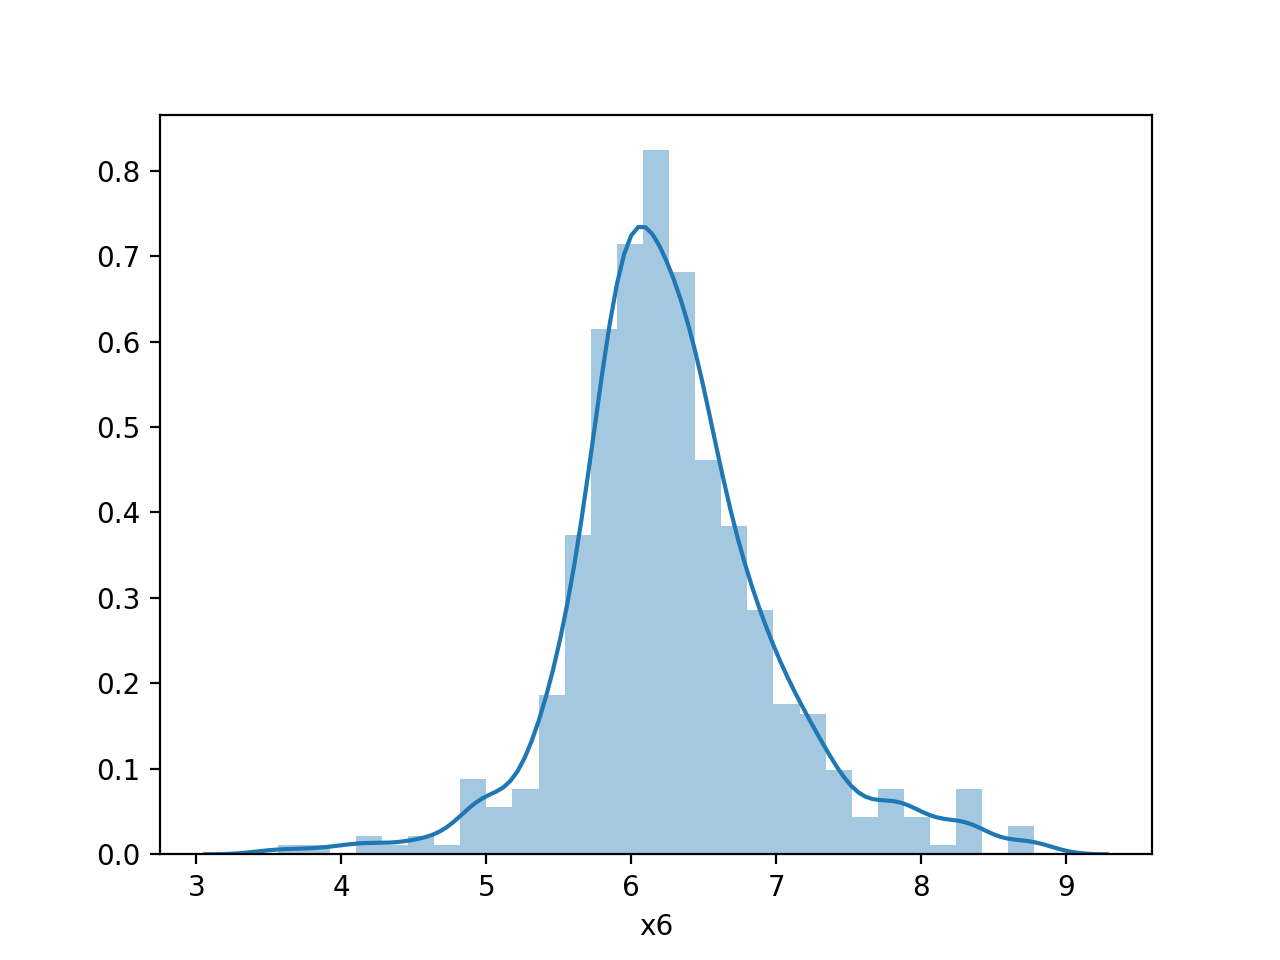

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [20]:
# 元々の分布
sns.distplot(df['x6'])

<IPython.core.display.Javascript object>


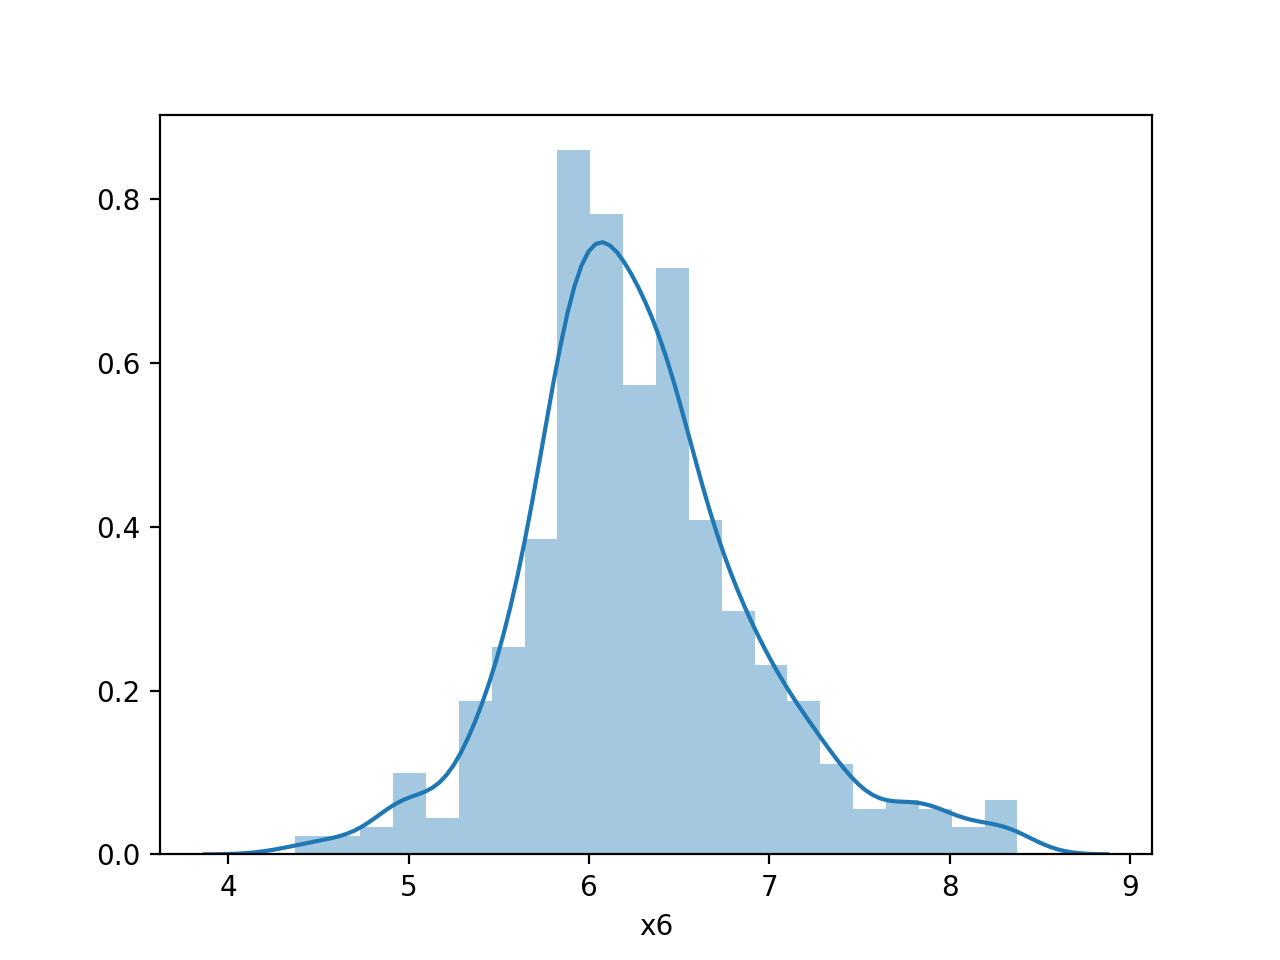

/Users/hayasakaryouta/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


In [22]:
# 外れ値除去した後の分布
sns.distplot(df2['x6'])

## 外れ値除去(3σ法)　全変数に対して

In [23]:
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [24]:
_df = df
for col in cols:
    # ３σ法の上下限値を設定
    low = mean[col] - 3*sigma[col]
    high = mean[col] + 3*sigma[col]
    # 条件での絞り込み
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [25]:
# オリジナル
len(df)

506

In [26]:
# ３σ法適用後
len(_df)

415

## モデルを構築

In [27]:
_df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [28]:
X = _df.iloc[:, :-1]
y = _df.iloc[:, -1]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=1)

In [32]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
# 訓練データの検証
model.score(X_train, y_train)

0.7972109224535134

In [35]:
# テストデータの検証
model.score(X_test,y_test)

0.6253776004329585

## スケーリングとパラメータの確認

In [37]:
from sklearn.preprocessing import StandardScaler

# scalerの宣言
scaler = StandardScaler()
# scalerの学習 ← 平均と標準偏差の計算
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
# scaling
X_train2 = scaler.transform(X_train)
X_test2 = scaler.transform(X_test)

In [39]:
model = LinearRegression()
model.fit(X_train2,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
# 訓練データの検証
model.score(X_train2, y_train)

0.7972109224535133

In [41]:
# テストデータの検証
model.score(X_test2,y_test)

0.6253776004329594